# Classification 

 -  Sınıflandırma * Cevabı evet hayır olan sorular için Classification modellerini kullanıyoruz. Metriklerimiz Matrix Accuaracy, F1 Score, Precision ve Recall 

### Paketleri import Ediyoruz

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)  #Bütün sütunları gösterir

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('hr_data.csv')

### EDA - Exploratary Data Alaysis

In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [5]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
268,45,Travel_Rarely,1385,Research & Development,20,2,Medical,1,372,3,...,80,0,21,2,3,20,7,4,10,No


In [6]:
# Attrition - İşten ayrılma demektir

In [7]:
df.shape

(1470, 35)

In [8]:
df.describe().T #Trasnpose - satırlar Sütun , sütunlar satır haline dönüyor 'T' koyarsan

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [10]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [11]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [12]:
df['Attrition'].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

In [13]:
import seaborn as sns

<Axes: xlabel='Attrition', ylabel='count'>

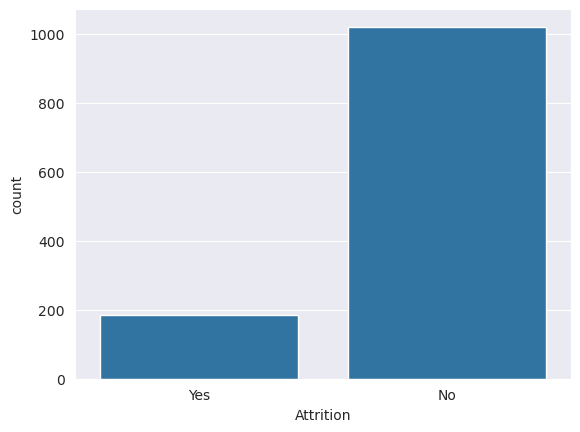

In [14]:
sns.countplot(x=df['Attrition'])

In [15]:
d={'No':0,'Yes':1}  # Classification 

In [16]:
df['Attrition']=df['Attrition'].map(d) # map kelimesi for döngüsünün modern hali

In [17]:
df['Attrition'].value_counts()

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

In [18]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0.0


In [19]:
bos=df[df['Attrition'].isnull()]  # Boş veriler

In [20]:
dolu=df[df['Attrition'].notnull()]  # Dolu veriler

In [21]:
bos.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,...,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,...,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,...,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,...,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,...,80,0,6,4,3,3,2,1,2,NaN


In [22]:
dolu.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0.0


In [23]:
x=dolu.drop('Attrition',axis=1)
y=dolu[['Attrition']]

In [24]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


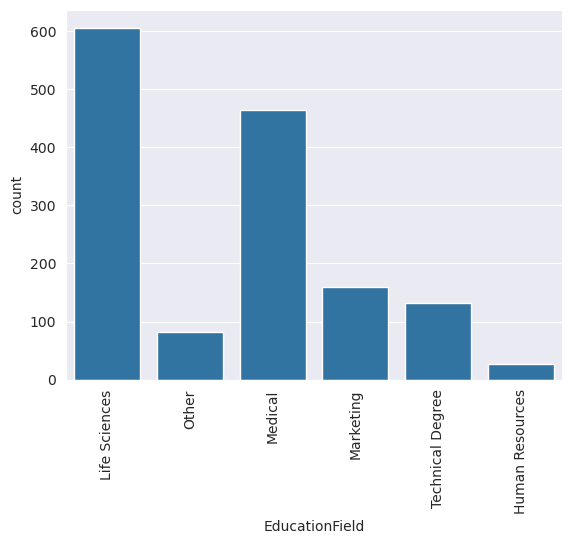

In [25]:
sns.countplot(x=df['EducationField'])
plt.xticks(rotation=90);

In [26]:
x=pd.get_dummies(x,drop_first=True)

In [27]:
x.head(1000)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,True,False,False,False,False,False,True,False,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,True,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,22,457,26,2,1,1605,2,85,2,1,...,False,False,False,False,False,False,True,False,False,True
1138,50,1234,20,5,1,1606,2,41,3,4,...,True,False,False,False,False,False,False,False,False,True
1139,32,634,5,4,1,1607,2,35,4,1,...,False,False,False,False,False,False,True,False,False,False
1140,44,1313,7,3,1,1608,2,31,3,5,...,False,False,False,False,False,True,False,False,False,True


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x.shape

(1205, 46)

In [31]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.naive_bayes import  BernoulliNB

In [32]:
g=GaussianNB()
b=BernoulliNB()

In [33]:
g.fit(x_train,y_train)

GaussianNB()

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
gtahmin = g.predict(x_test)

In [36]:
accuracy_score(gtahmin,y_test)

0.7883817427385892

In [37]:
confusion_matrix(gtahmin,y_test)

array([[171,  11],
       [ 40,  19]])

In [38]:
import seaborn as sns


<Axes: >

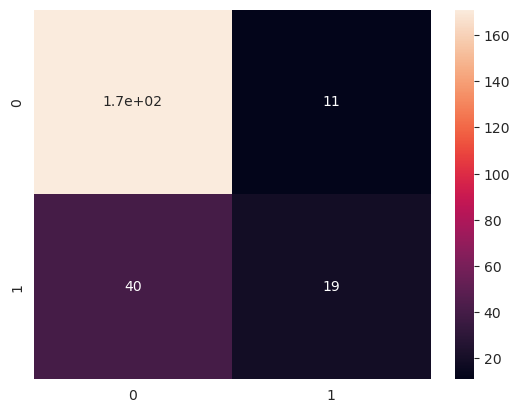

In [39]:
sns.heatmap(confusion_matrix(gtahmin,y_test),annot=True)

In [40]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [41]:
b.fit(x_train,y_train)

BernoulliNB()

In [42]:
btahmin = b.predict(x_test)

In [43]:
accuracy_score(btahmin,y_test)

0.8257261410788381

In [44]:
confusion_matrix(btahmin,y_test)

array([[192,  23],
       [ 19,   7]])

In [45]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



In [46]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [47]:
l.fit(x_train,y_train)

LogisticRegression()

In [48]:
ltahmin=l.predict(x_test)

In [49]:
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       239
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       241
   macro avg       0.50      0.44      0.46       241
weighted avg       0.98      0.87      0.92       241



In [50]:
confusion_matrix(ltahmin,y_test)

array([[209,  30],
       [  2,   0]])

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
d=DecisionTreeClassifier()

In [53]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dtahmin=d.predict(x_test)

In [55]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       204
         1.0       0.27      0.22      0.24        37

    accuracy                           0.79       241
   macro avg       0.56      0.55      0.56       241
weighted avg       0.77      0.79      0.78       241



In [56]:
confusion_matrix(dtahmin,y_test)

array([[182,  22],
       [ 29,   8]])

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
r=RandomForestClassifier()

In [59]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
rtahmin=r.predict(x_test)

In [61]:
confusion_matrix(rtahmin,y_test)

array([[211,  27],
       [  0,   3]])

In [62]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       238
         1.0       0.10      1.00      0.18         3

    accuracy                           0.89       241
   macro avg       0.55      0.94      0.56       241
weighted avg       0.99      0.89      0.93       241



In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
h=GradientBoostingClassifier()

In [65]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [66]:
htahmin=h.predict(x_test)

In [67]:
confusion_matrix(htahmin,y_test)

array([[208,  24],
       [  3,   6]])

In [68]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.20      0.67      0.31         9

    accuracy                           0.89       241
   macro avg       0.59      0.78      0.62       241
weighted avg       0.96      0.89      0.92       241



In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
k=KNeighborsClassifier()

In [71]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
ktahmin=k.predict(x_test)

In [73]:
confusion_matrix(ktahmin,y_test)

array([[205,  29],
       [  6,   1]])

In [74]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       234
         1.0       0.03      0.14      0.05         7

    accuracy                           0.85       241
   macro avg       0.50      0.51      0.49       241
weighted avg       0.94      0.85      0.90       241



In [74]:
 1. Veri Ön İşleme
df = pd.read_csv('sales_data.csv')
df = df.dropna()  # Eksik değerleri temizle

# 2. Regresyon Modeli Oluşturma
X = df[['TV', 'Radyo', 'Gazete']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

# 3. Model Performansını Değerlendirme
train_pred = model.predict(X)
r2 = model.score(X, y)
mse = ((y - train_pred)**2).mean()
rmse = (mse)**0.5
print(f'R-kare: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# 4. İlan Harcamalarının Satış Üzerindeki Etkisini Değerlendirme
print('Regresyon Katsayıları:')
print(f'TV: {model.coef_[0]:.2f}')
print(f'Radyo: {model.coef_[1]:.2f}')
print(f'Gazete: {model.coef_[2]:.2f}')

# 5. Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Gerçek Satış')
plt.plot(train_pred, label='Tahmin Edilen Satış')
plt.xlabel('Gözlem')
plt.ylabel('Satış')
plt.title('Gerçek Satış vs Tahmin Edilen Satış')
plt.legend()
plt.show()